<a href="https://colab.research.google.com/github/Sen-Ma/Dacon/blob/master/Dacon_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Dacon/train.csv', index_col = 0)
test = pd.read_csv('/content/gdrive/My Drive/Dacon/test.csv', index_col = 0)
sample_submission = pd.read_csv('/content/gdrive/My Drive/Dacon/sample_submission.csv', index_col = 0)

In [0]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
  column_number[column]=i

def to_number(x, dic):
  return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

In [0]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
id,,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


In [0]:
train['psfMag_sum'] = train.iloc[:,2:7].sum(axis=1)
train['fiberMag_sum'] = train.iloc[:,7:12].sum(axis=1)
train['petroMag_sum'] = train.iloc[:,12:17].sum(axis=1)
train['modelMag_sum'] = train.iloc[:,17:22].sum(axis=1)

In [0]:
train_x = train.drop(columns = ['type', 'type_num'], axis = 1)
train_y = train['type_num']
test_x = test

In [98]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier, plot_importance
lgb = LGBMClassifier()
lgb.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [102]:
test.iloc[:,1:6]

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
id,,,,,
199991,23.817399,22.508963,20.981106,18.517316,17.076079
199992,22.806983,21.937111,20.335770,20.000512,19.527369
199993,21.024250,19.235669,18.304061,17.808608,17.380113
199994,20.503424,20.286261,20.197204,20.162419,20.059832
199995,24.244851,22.668237,21.239333,19.284777,18.235939
...,...,...,...,...,...
209995,19.765035,19.542406,19.439286,19.357957,19.357305
209996,19.960030,19.609379,19.325949,19.391290,19.258862
209997,21.221899,20.276182,20.090775,19.927208,19.766732


In [0]:
test_x
test['psfMag_sum'] = test.iloc[:,1:6].sum(axis=1)
test['fiberMag_sum'] = test.iloc[:,6:11].sum(axis=1)
test['petroMag_sum'] = test.iloc[:,11:16].sum(axis=1)
test['modelMag_sum'] = test.iloc[:,16:21].sum(axis=1)

In [0]:
lgb_pred = lgb.predict_proba(test_x)

In [0]:
submission = pd.DataFrame(data=lgb_pred, columns = sample_submission.columns, index = sample_submission.index)
submission.to_csv('submission.csv', index = True)

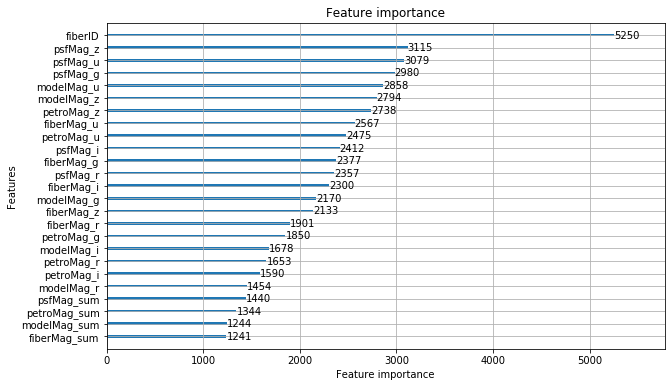

In [106]:
fig, ax = plt.subplots(figsize = (10,6))
plot_importance(lgb, ax = ax)

천체 유형 분류 문제이다. 천문학에 대한 전반적인 지식이 부족하여 데이터 핸들링을 할 수 없어 다른 Competition을 진행하려고 한다.